<a href="https://colab.research.google.com/github/Tlen33/Data-clustering-algorithms/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключаем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras import utils
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# Подключаем диск

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загружаем базу

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Базы/online_carts.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Период: Февраль 2019 г. - Август 2019 г.,NaN,NaN,NaN
1,NaN,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),NaN,NaN
2,NaN,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),NaN
3,NaN,Отборы:\nПодразделение В списке (estel.m-cosme...,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,ЗаказПокупателя.Дата оправки,Стоимость продажи (руб.),Количество,NaN
6,NaN,ЗаказПокупателя.ID заказа,С НДС,Базовых ед.,NaN
7,NaN,Номенклатура.Наименование,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,01.01.2019 0:00:00,26236,9,NaN


In [ ]:
# Редактируем базу

new = df.drop(['Unnamed: 0'], axis =1)
new.insert(0, column='Дата', value = [x for x in range(len(new))])
new = new.fillna('unknown')

In [ ]:
new.head(30)

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,Период: Февраль 2019 г. - Август 2019 г.,unknown,unknown,unknown
1,1,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),unknown,unknown
2,2,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),unknown
3,3,Отборы:\nПодразделение В списке (estel.m-cosme...,unknown,unknown,unknown
4,4,unknown,unknown,unknown,unknown
5,5,ЗаказПокупателя.Дата оправки,Стоимость продажи (руб.),Количество,unknown
6,6,ЗаказПокупателя.ID заказа,С НДС,Базовых ед.,unknown
7,7,Номенклатура.Наименование,unknown,unknown,unknown
8,8,unknown,unknown,unknown,unknown
9,9,01.01.2019 0:00:00,26236,9,unknown


In [ ]:
new[new['Валовая прибыль'].str.contains("MCOSM")]

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
10,10,MCOSM13113,26236,9,unknown
22,22,MCOSM13113,1929,4,unknown
166,166,MCOSM4885,350,2,unknown
168,168,MCOSM4996,9436,4,unknown
172,172,MCOSM5963,8625,6,unknown
...,...,...,...,...,...
99589,99589,MCOSM33527,2714,6,unknown
99596,99596,MCOSM33529,3145,9,unknown
99603,99603,MCOSM33530,3030,12,unknown
99616,99616,MCOSM33537,2259,2,unknown


In [ ]:
date_list = list(new[new['Валовая прибыль'].str.contains("\d\d.\d\d.2019")].index)

indx=0
for i in range(len(new)):
  if i in date_list:
    indx = i
  new['Дата'][i] = new['Валовая прибыль'][indx]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
new = new.drop(new[new['Дата'].str.contains('Период')].index,axis = 0)
new = new.drop(new[new['Валовая прибыль'].str.contains('unknown')].index,axis=0)
new = new.drop(new[new['Валовая прибыль']==new['Дата']].index)
new.reset_index(inplace=True)
new = new.drop('index',axis=1)

In [ ]:
cart_list = list(new[new['Валовая прибыль'].str.contains("MCOSM")].index)
cafre_list = list(new[new['Валовая прибыль'].str.contains("CAFRE")].index)

In [ ]:
new.head()

,Дата,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,01.01.2019 0:00:00,MCOSM13113,26236,9,unknown
1,01.01.2019 0:00:00,CONTURA (HS61) машинка для стрижки волос,9059,1,unknown
2,01.01.2019 0:00:00,Holika Holika Универсальный гель 99% алоэ вера...,539,1,unknown
3,01.01.2019 0:00:00,Kapous Бальзам-уход для придания объема Volume...,181,1,unknown
4,01.01.2019 0:00:00,Kapous Шампунь для придания объема Volume up 3...,181,1,unknown


In [ ]:
# Создаем корзины

carts = []
cart=[]
i=0
val = new['Валовая прибыль']
allPositions = []

while i!=len(new):
  if i in cart_list:
    if i!=cart_list[-1]:
      ind = cart_list.index(i)
      while i<cart_list[ind+1]-1:
        cart.append(val[i+1])
        allPositions.append(val[i+1]) 
        i+=1 
    else:
      while i<(len(new)-1):
        cart.append(val[i+1])
        allPositions.append(val[i+1]) 
        i+=1
    carts.append(cart)
    cart=[]
  else:
    i+=1

In [ ]:
print(len(carts)==len(cart_list))
print('Количество всех позиций: ', len(allPositions))
print('Пример того, что лежит в корзине: ', carts[0])

True
Количество всех позиций:  85617
Пример того, что лежит в корзине:  ['CONTURA (HS61) машинка для стрижки волос', 'Holika Holika Универсальный гель 99% алоэ вера, 250 мл', 'Kapous Бальзам-уход для придания объема Volume up 350 мл', 'Kapous Шампунь для придания объема Volume up 350 мл', 'XPERT (HS71) машинка для стрижки волос', 'ЛП ТНА САВАЖ ПАНАШ 250 мл', 'перчатки (50 пар) винил размер S черные', 'Услуга доставки DPD до двери', 'Услуга доставки СДЭК']


In [ ]:
# Создаем объект LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(allPositions)

LabelEncoder()

In [ ]:
# Считаем количество уникальных товаров

maxPositionsCount = max(labelEncoder.transform(allPositions))+1
print(maxPositionsCount)

6663


In [ ]:
# Создаем список индексов для каждой корзины

cartsIndexes = [labelEncoder.transform(c) for c in carts]
n = 5
print(carts[n])
print(cartsIndexes[n])

['10/65 светлый блондин фиолетово-красный DLSe', '10/76 светлый блондин коричнево-фиолетовый DLSe', 'Бальзам DE LUXE для выравнивания структуры 1000 мл.', 'Бальзам DE LUXE стабилизатор цвета 1000 мл.', 'Восстанавливающий эликсир LuxeOil 100 мл.', 'Разглаживающее масло для интенсивного блеска 100 мл. Wella', 'Шампунь DE LUXE интенсивное очищение 1000 мл.', 'Шампунь DE LUXE стабилизатор цвета 1000 мл.']
[ 211  239 3092 3093 3323 5181 5742 5743]


In [ ]:
# Функции bag of words

def changeXTo01(trainVector, wordsCount):
  out = np.zeros(wordsCount)
  for x in trainVector:
    out[x] = 1
  return out

def changeSetTo01(trainSet, wordsCount):
  out = []
  for x in trainSet:
    out.append(changeXTo01(x, wordsCount))
  return np.array(out)

In [ ]:
# Создаем выборку по принципу bag of words

carts01 = changeSetTo01(cartsIndexes, maxPositionsCount)
n = 5
print(carts[n])
print(cartsIndexes[n])
print(carts01[n])

['10/65 светлый блондин фиолетово-красный DLSe', '10/76 светлый блондин коричнево-фиолетовый DLSe', 'Бальзам DE LUXE для выравнивания структуры 1000 мл.', 'Бальзам DE LUXE стабилизатор цвета 1000 мл.', 'Восстанавливающий эликсир LuxeOil 100 мл.', 'Разглаживающее масло для интенсивного блеска 100 мл. Wella', 'Шампунь DE LUXE интенсивное очищение 1000 мл.', 'Шампунь DE LUXE стабилизатор цвета 1000 мл.']
[ 211  239 3092 3093 3323 5181 5742 5743]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Кластеризация

cur_time = time.time()
clustersCount = 100
kmean = KMeans(clustersCount)
kmean.fit(carts01)
labels = kmean.labels_
npCarts = np.array(carts)
print('Время обработки: ', round(time.time() - cur_time,2),'c')

Время обработки:  346.3 c


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
# Отображаем метки кластеров

print(labels)
clusterSize = [sum(labels==i) for i in range(0, clustersCount)]
for i, s in enumerate(clusterSize):
  print(i, s)

[98 60  3 ... 52 53 98]
0 1
1 56
2 271
3 3491
4 1
5 1
6 1
7 81
8 1
9 1
10 264
11 83
12 1
13 1
14 1
15 1
16 1
17 1
18 234
19 1
20 76
21 1
22 1
23 1
24 18
25 1
26 40
27 1
28 1
29 91
30 1
31 304
32 1
33 128
34 1
35 1
36 23
37 57
38 1
39 1
40 1
41 1
42 1
43 1
44 213
45 1
46 56
47 2
48 1
49 1
50 3041
51 1
52 3017
53 133
54 1
55 1
56 1
57 1
58 1
59 25
60 1
61 1
62 1
63 1
64 351
65 63
66 1
67 1
68 1
69 14
70 227
71 1
72 1
73 40
74 1
75 200
76 1
77 6
78 1
79 1
80 7
81 1
82 1
83 1
84 94
85 1
86 1
87 1
88 1
89 2
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 792
99 1


In [ ]:
# Список позиций кластера

def getCluster(x):
  clasterSize = x.shape[0]
  sumX = np.sum(x, axis=0)
  sumX /= clasterSize
  positions = []
  positionValues = []
  for i in range(sumX.shape[0]):
    if (sumX[i] > 0):
      position = labelEncoder.inverse_transform([i])
      positions.append(position)
      positionValues.append(sumX[i])

  return positions, positionValues

for clusterNumber in range(len(clusterSize)):
  if (clusterSize[clusterNumber] > 5):
    pos, posVal = getCluster(carts01[labels==clusterNumber])
    print("Покупок:", clusterSize[clusterNumber])
    print("Позиций:", len(pos))
    pos = np.array(pos)
    posVal = np.array(posVal)
    indexes = posVal > 0.6
    indexedPos = pos[indexes]
    indexedPosVal = posVal[indexes]

    for i in range(len(indexedPos)):
      print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

    print()
    print()

Покупок: 56
Позиций: 272
100% ['Шампунь для волос с комплексом масел  Q3 1000 мл.']


Покупок: 271
Позиций: 930
99% ['Оксигент 6% 60 мл DE LUXE']


Покупок: 3491
Позиций: 3181
100% ['Услуга доставки СДЭК']


Покупок: 81
Позиций: 631
100% ['воротнички на липучке в рулоне (100 шт.)']


Покупок: 264
Позиций: 556
100% ['Услуга доставки DPD самовывоз']


Покупок: 83
Позиций: 602


Покупок: 234
Позиций: 552
100% ['Серебристая маска для холодных оттенков блонд ESTEL PRIMA BLONDE 300 мл.']


Покупок: 76
Позиций: 402
68% ['Бальзам Серебристый для холодных оттенков блонд 250 мл.']
76% ['Шампунь Серебристый для холодных оттенков блонд 300 мл.']


Покупок: 18
Позиций: 139
72% ['Крем для естественного загара в солярии Delicato 12 мл.']
78% ['Крем для загара в солярии Blue Lagoon 12 мл.']
94% ['Крем для загара в солярии Brown Coco Nectar 15 мл.']
89% ['Крем для загара в солярии Brown Mango Nectar 15 мл.']
61% ['Крем для загара в солярии Choсоlate 15 мл.']
67% ['Крем для загара в солярии Daiquiri 12 

Готово разбиение на 20 классов
Готово разбиение на 40 классов
Готово разбиение на 60 классов
Готово разбиение на 80 классов
Готово разбиение на 100 классов
Готово разбиение на 120 классов
Готово разбиение на 140 классов
Готово разбиение на 160 классов
Готово разбиение на 180 классов
Готово разбиение на 200 классов
Готово разбиение на 220 классов
Готово разбиение на 240 классов
Готово разбиение на 260 классов
Готово разбиение на 280 классов


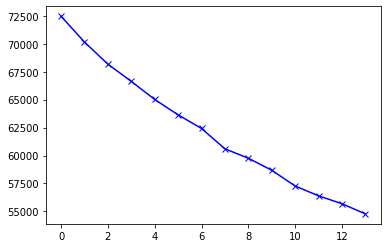

In [ ]:
cost = []
for i in range(1,15):
  kmean = KMeans(i*20)
  kmean.fit(carts01)
  cost.append(kmean.inertia_)
  print("Готово разбиение на ", i*20, " классов", sep="")
    
plt.plot(cost, 'bx-')

In [ ]:
# Разбиение на 280 классов

for clusterNumber in range(max(labels)):
    if (clusterSize[clusterNumber] > 5):
      pos, posVal = getCluster(carts01[labels==clusterNumber])
      print("Покупок:", clusterSize[clusterNumber])
      print("Позиций:", len(pos))
      pos = np.array(pos)
      posVal = np.array(posVal)
      indexes = posVal > 0.2
      indexedPos = pos[indexes]
      indexedPosVal = posVal[indexes]

      for i in range(len(indexedPos)):
        print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

      print()
      print()

Покупок: 56
Позиций: 272
30% ['Маска для волос с комплексом масел 300 мл.']
100% ['Шампунь для волос с комплексом масел  Q3 1000 мл.']


Покупок: 271
Позиций: 930
28% ['Оксигент 3% 60 мл DE LUXE']
99% ['Оксигент 6% 60 мл DE LUXE']
23% ['Пудра  для обесцвечивания, 30 гр. De Luxe']
32% ['Услуга доставки СДЭК']


Покупок: 3491
Позиций: 3181
100% ['Услуга доставки СДЭК']


Покупок: 81
Позиций: 631
40% ['Услуга доставки Почта России']
100% ['воротнички на липучке в рулоне (100 шт.)']


Покупок: 264
Позиций: 556
100% ['Услуга доставки DPD самовывоз']


Покупок: 83
Позиций: 602
22% ['10/0 Стойкая крем-краска яркий блонд']
29% ['10/16 Стойкая крем-краска яркий блонд пепельно-фиолетовый']
24% ['10/38 Стойкая крем-краскад/в яркий блонд золотисто']
28% ['10/8 Стойкая крем-краска яркий блонд жемчужный']
35% ['12/61 Стойкая крем-краска специальный блонд фиолет']
23% ['12/81 Стойкая крем-краска специальный блонд жемч']
35% ['4/0 Стойкая крем-краска шатен']
23% ['4/71 Стойкая крем-краска шатен коричн

In [ ]:
# Кластеризация на 5 кластеров

cur_time = time.time()
clustersCount = 5
kmean = KMeans(clustersCount)
kmean.fit(carts01)
labels = kmean.labels_
npCarts = np.array(carts)
print('Время обработки: ', round(time.time() - cur_time,2),'c')

Время обработки:  21.15 c


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
# Отображаем метки кластеров

print(labels)
clusterSize = [sum(labels==i) for i in range(0, clustersCount)]
for i, s in enumerate(clusterSize):
  print(i, s)

[2 3 2 ... 1 1 1]
0 2
1 6174
2 3864
3 141
4 3386


In [ ]:
# Список позиций кластера

def getCluster(x):
  clasterSize = x.shape[0]
  sumX = np.sum(x, axis=0)
  sumX /= clasterSize
  positions = []
  positionValues = []
  for i in range(sumX.shape[0]):
    if (sumX[i] > 0):
      position = labelEncoder.inverse_transform([i])
      positions.append(position)
      positionValues.append(sumX[i])

  return positions, positionValues

for clusterNumber in range(len(clusterSize)):
  if (clusterSize[clusterNumber] > 5):
    pos, posVal = getCluster(carts01[labels==clusterNumber])
    print("Покупок:", clusterSize[clusterNumber])
    print("Позиций:", len(pos))
    pos = np.array(pos)
    posVal = np.array(posVal)
    indexes = posVal > 0.6
    indexedPos = pos[indexes]
    indexedPosVal = posVal[indexes]

    for i in range(len(indexedPos)):
      print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

    print()
    print()

Покупок: 6174
Позиций: 5353


Покупок: 3864
Позиций: 3451
100% ['Услуга доставки СДЭК']


Покупок: 141
Позиций: 3292
72% ['Услуга доставки Почта России']
70% ['Услуга доставки СДЭК']


Покупок: 3386
Позиций: 3860
100% ['Услуга доставки Почта России']




Готово разбиение на 20 классов
Готово разбиение на 40 классов
Готово разбиение на 60 классов
Готово разбиение на 80 классов
Готово разбиение на 100 классов
Готово разбиение на 120 классов
Готово разбиение на 140 классов
Готово разбиение на 160 классов
Готово разбиение на 180 классов
Готово разбиение на 200 классов
Готово разбиение на 220 классов
Готово разбиение на 240 классов
Готово разбиение на 260 классов
Готово разбиение на 280 классов


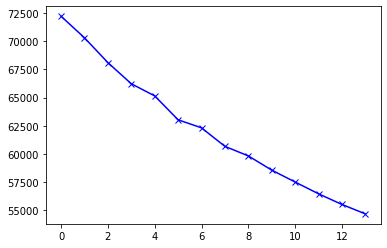

In [ ]:
cost = []
for i in range(1,15):
  kmean = KMeans(i*20)
  kmean.fit(carts01)
  cost.append(kmean.inertia_)
  print("Готово разбиение на ", i*20, " классов", sep="")
    
plt.plot(cost, 'bx-')

In [ ]:
# Разбиение на 280 классов

for clusterNumber in range(max(labels)):
    if (clusterSize[clusterNumber] > 5):
      pos, posVal = getCluster(carts01[labels==clusterNumber])
      print("Покупок:", clusterSize[clusterNumber])
      print("Позиций:", len(pos))
      pos = np.array(pos)
      posVal = np.array(posVal)
      indexes = posVal > 0.2
      indexedPos = pos[indexes]
      indexedPosVal = posVal[indexes]

      for i in range(len(indexedPos)):
        print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

      print()
      print()

Покупок: 6174
Позиций: 5353


Покупок: 3864
Позиций: 3451
100% ['Услуга доставки СДЭК']


Покупок: 141
Позиций: 3292
21% ['10/81 яркий блонд перламутрово-пепельный Интенсивное тонирование НОВЫЙ']
26% ['12/0 Стойкая крем-краска специальный блонд']
34% ['12/61 Стойкая крем-краска специальный блонд фиолет']
25% ['12/81 Стойкая крем-краска специальный блонд жемч']
30% ['12/89 Стойкая крем-краска специальный блонд жемчуж']
26% ['4/0 Стойкая крем-краска шатен']
32% ['5/0 Стойкая крем-краска светлый шатен']
30% ['6/0 Стойкая крем-краска темный блонд']
21% ['6/1 Стойкая крем-краска темный блонд пепельный']
25% ['6/7 Стойкая крем-краска темный блонд коричневый']
25% ['6/71 Стойкая крем-краска темный блонд коричнево-пе']
23% ['6/77 Стойкая крем-краска темный блонд интенсивно-коричневый']
36% ['7/0 Стойкая крем-краска блонд']
21% ['8/0 Стойкая крем-краска светлый блонд']
29% ['9/1 Стойкая крем-краска очень светлый блонд пепель']
29% ['AQUATIKA Маска-смузи  увлажнение Likato 250мл']
23% ['AQUATIKA

In [ ]:
# Кластеризация на 50 кластеров

cur_time = time.time()
clustersCount = 50
kmean = KMeans(clustersCount)
kmean.fit(carts01)
labels = kmean.labels_
npCarts = np.array(carts)
print('Время обработки: ', round(time.time() - cur_time,2),'c')

Время обработки:  120.65 c


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
# Отображаем метки кластеров

print(labels)
clusterSize = [sum(labels==i) for i in range(0, clustersCount)]
for i, s in enumerate(clusterSize):
  print(i, s)

[41 48  5 ... 28 28 41]
0 1
1 94
2 58
3 148
4 3035
5 3532
6 67
7 1
8 1
9 198
10 1
11 75
12 35
13 1
14 1
15 1
16 1
17 1
18 1
19 6
20 1
21 414
22 10
23 55
24 334
25 1
26 200
27 1
28 4015
29 1
30 1
31 1
32 1
33 1
34 102
35 1
36 1
37 1
38 1
39 1
40 46
41 828
42 1
43 1
44 1
45 1
46 1
47 285
48 1
49 1


In [ ]:
# Список позиций кластера

def getCluster(x):
  clasterSize = x.shape[0]
  sumX = np.sum(x, axis=0)
  sumX /= clasterSize
  positions = []
  positionValues = []
  for i in range(sumX.shape[0]):
    if (sumX[i] > 0):
      position = labelEncoder.inverse_transform([i])
      positions.append(position)
      positionValues.append(sumX[i])

  return positions, positionValues

for clusterNumber in range(len(clusterSize)):
  if (clusterSize[clusterNumber] > 5):
    pos, posVal = getCluster(carts01[labels==clusterNumber])
    print("Покупок:", clusterSize[clusterNumber])
    print("Позиций:", len(pos))
    pos = np.array(pos)
    posVal = np.array(posVal)
    indexes = posVal > 0.6
    indexedPos = pos[indexes]
    indexedPosVal = posVal[indexes]

    for i in range(len(indexedPos)):
      print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

    print()
    print()

Покупок: 94
Позиций: 2066


Покупок: 58
Позиций: 317
100% ['Шампунь для волос с комплексом масел  Q3 1000 мл.']


Покупок: 148
Позиций: 572
84% ['Бальзам для окрашенных волос ESTEL PRINCESS ESSEX 1000 мл.']
80% ['Шампунь для окрашенных волос ESTEL PRINCESS ESSEX 1000 мл.']


Покупок: 3035
Позиций: 3445
100% ['Услуга доставки Почта России']


Покупок: 3532
Позиций: 3298
100% ['Услуга доставки СДЭК']


Покупок: 67
Позиций: 632
82% ['Kapous Бальзам для окрашенных волос 1 л']
94% ['Kapous Шампунь для окрашенных волос 1 л']


Покупок: 198
Позиций: 1113
71% ['Kapous Кератин бальзам серии Magic Keratin 1000 мл']
96% ['Kapous Кератин шампунь серии Magic Keratin Professional 1000 мл']


Покупок: 75
Позиций: 264
100% ['Скраб с морской солью (регенерирующий) Likato 250мл']


Покупок: 35
Позиций: 507
100% ['OLLIN Спа-ламинирование ШАГ 1 Ламинирующий шампунь 250 мл']
100% ['OLLIN Спа-ламинирование ШАГ 2 Горячая фаза 250 мл']
94% ['OLLIN Спа-ламинирование ШАГ 3 Холодная фаза 250 мл']
100% ['OLLIN Сп

Готово разбиение на 20 классов
Готово разбиение на 40 классов
Готово разбиение на 60 классов
Готово разбиение на 80 классов
Готово разбиение на 100 классов
Готово разбиение на 120 классов
Готово разбиение на 140 классов
Готово разбиение на 160 классов
Готово разбиение на 180 классов
Готово разбиение на 200 классов
Готово разбиение на 220 классов
Готово разбиение на 240 классов
Готово разбиение на 260 классов
Готово разбиение на 280 классов


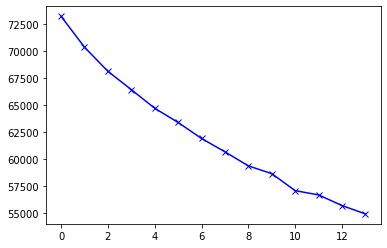

In [ ]:
cost = []
for i in range(1,15):
  kmean = KMeans(i*20)
  kmean.fit(carts01)
  cost.append(kmean.inertia_)
  print("Готово разбиение на ", i*20, " классов", sep="")
    
plt.plot(cost, 'bx-')

In [ ]:
# Разбиение на 280 классов

for clusterNumber in range(max(labels)):
    if (clusterSize[clusterNumber] > 5):
      pos, posVal = getCluster(carts01[labels==clusterNumber])
      print("Покупок:", clusterSize[clusterNumber])
      print("Позиций:", len(pos))
      pos = np.array(pos)
      posVal = np.array(posVal)
      indexes = posVal > 0.2
      indexedPos = pos[indexes]
      indexedPosVal = posVal[indexes]

      for i in range(len(indexedPos)):
        print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

      print()
      print()

Покупок: 94
Позиций: 2066
26% ['10/0 Стойкая крем-краска яркий блонд']
22% ['10/16 Стойкая крем-краска яркий блонд пепельно-фиолетовый']
26% ['10/38 Стойкая крем-краскад/в яркий блонд золотисто']
27% ['10/8 Стойкая крем-краска яркий блонд жемчужный']
22% ['10/81 яркий блонд перламутрово-пепельный Интенсивное тонирование НОВЫЙ']
35% ['12/0 Стойкая крем-краска специальный блонд']
47% ['12/61 Стойкая крем-краска специальный блонд фиолет']
39% ['12/81 Стойкая крем-краска специальный блонд жемч']
39% ['12/89 Стойкая крем-краска специальный блонд жемчуж']
23% ['3/0 Стойкая крем-краска темный шатен']
35% ['4/0 Стойкая крем-краска шатен']
30% ['4/71 Стойкая крем-краска шатен коричнево-пепельный']
24% ['4/77 Стойкая крем-краска шатен интенсивно-коричнев']
48% ['5/0 Стойкая крем-краска светлый шатен']
27% ['5/7 Стойкая крем-краска светлый шатен коричневый']
29% ['5/71 Стойкая крем-краска светлый шатен коричнево-п']
46% ['6/0 Стойкая крем-краска темный блонд']
30% ['6/1 Стойкая крем-краска темный

In [ ]:
# Кластеризация на 500 кластеров

cur_time = time.time()
clustersCount = 500
kmean = KMeans(clustersCount)
kmean.fit(carts01)
labels = kmean.labels_
npCarts = np.array(carts)
print('Время обработки: ', round(time.time() - cur_time,2),'c')

Время обработки:  989.33 c


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
# Отображаем метки кластеров

print(labels)
clusterSize = [sum(labels==i) for i in range(0, clustersCount)]
for i, s in enumerate(clusterSize):
  print(i, s)

[ 26  13  83 ... 365 361 444]
0 71
1 64
2 9
3 1
4 2427
5 252
6 1
7 1
8 1
9 11
10 2
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 93
23 1
24 1
25 1
26 713
27 22
28 8
29 1
30 51
31 22
32 1
33 1
34 1
35 1
36 1
37 120
38 1
39 40
40 85
41 1
42 1
43 24
44 1
45 3
46 1
47 174
48 1
49 1
50 78
51 1
52 1
53 1
54 1
55 18
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 43
64 1
65 1
66 1
67 222
68 1
69 45
70 1
71 1
72 1
73 1
74 38
75 32
76 1
77 1
78 1
79 53
80 1
81 1
82 1
83 3143
84 1
85 1
86 1
87 4
88 1
89 1
90 19
91 1
92 1
93 27
94 1
95 1
96 1
97 1
98 2
99 23
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 37
109 1
110 12
111 1
112 1
113 1
114 1
115 11
116 1
117 1
118 159
119 32
120 1
121 1
122 1
123 1
124 1
125 1
126 36
127 1
128 1
129 1
130 5
131 19
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 22
141 1
142 1
143 7
144 48
145 1
146 1
147 1
148 1
149 63
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 53
167 1
168 1
169 1
170 27
171 5

In [ ]:
# Список позиций кластера

def getCluster(x):
  clasterSize = x.shape[0]
  sumX = np.sum(x, axis=0)
  sumX /= clasterSize
  positions = []
  positionValues = []
  for i in range(sumX.shape[0]):
    if (sumX[i] > 0):
      position = labelEncoder.inverse_transform([i])
      positions.append(position)
      positionValues.append(sumX[i])

  return positions, positionValues

for clusterNumber in range(len(clusterSize)):
  if (clusterSize[clusterNumber] > 5):
    pos, posVal = getCluster(carts01[labels==clusterNumber])
    print("Покупок:", clusterSize[clusterNumber])
    print("Позиций:", len(pos))
    pos = np.array(pos)
    posVal = np.array(posVal)
    indexes = posVal > 0.6
    indexedPos = pos[indexes]
    indexedPosVal = posVal[indexes]

    for i in range(len(indexedPos)):
      print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

    print()
    print()

Покупок: 71
Позиций: 299
61% ['OLLIN SERVICE LINE Увлаж. Бальзам для волос 1000 мл']
85% ['OLLIN SERVICE LINE Шампунь для ежедн. примен.pH5.5 1000 мл']


Покупок: 64
Позиций: 233
100% ['Скраб с морской солью (регенерирующий) Likato 250мл']


Покупок: 9
Позиций: 96
100% ['5/7 Крем-краска ESTEL PRINCESS ESSEX шоколад']


Покупок: 2427
Позиций: 2839
100% ['Услуга доставки Почта России']


Покупок: 252
Позиций: 486
100% ['Услуга доставки DPD самовывоз']


Покупок: 11
Позиций: 46
100% ['Спрей-уход для волос защита и питание 200 мл.']
73% ['Шампунь для интенсивного увлажнения волос OTIUM AQUA 1000 мл.']


Покупок: 93
Позиций: 368
100% ['Масло Velvet Oil с аргановым маслом 100 мл. Londa']


Покупок: 713
Позиций: 1226
100% ['Услуга доставки DPD до двери']


Покупок: 22
Позиций: 72
64% ['Бальзам для ежедневного применения 1000 мл. Curex Classic']
77% ['Шампунь для ежедневного применения 1000 мл. Curex Classic']
91% ['Шампунь для окрашенных волос ESTEL PRINCESS ESSEX 1000 мл.']


Покупок: 8
Пози

Готово разбиение на 20 классов
Готово разбиение на 40 классов
Готово разбиение на 60 классов
Готово разбиение на 80 классов
Готово разбиение на 100 классов
Готово разбиение на 120 классов
Готово разбиение на 140 классов
Готово разбиение на 160 классов
Готово разбиение на 180 классов
Готово разбиение на 200 классов
Готово разбиение на 220 классов
Готово разбиение на 240 классов
Готово разбиение на 260 классов
Готово разбиение на 280 классов


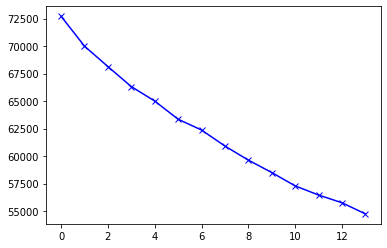

In [ ]:
cost = []
for i in range(1,15):
  kmean = KMeans(i*20)
  kmean.fit(carts01)
  cost.append(kmean.inertia_)
  print("Готово разбиение на ", i*20, " классов", sep="")
    
plt.plot(cost, 'bx-')

In [ ]:
# Разбиение на 280 классов

for clusterNumber in range(max(labels)):
    if (clusterSize[clusterNumber] > 5):
      pos, posVal = getCluster(carts01[labels==clusterNumber])
      print("Покупок:", clusterSize[clusterNumber])
      print("Позиций:", len(pos))
      pos = np.array(pos)
      posVal = np.array(posVal)
      indexes = posVal > 0.2
      indexedPos = pos[indexes]
      indexedPosVal = posVal[indexes]

      for i in range(len(indexedPos)):
        print(round(100*indexedPosVal[i]), "% ", indexedPos[i], sep="")

      print()
      print()

Покупок: 71
Позиций: 299
32% ['OLLIN SERVICE LINE Кондиционер для ежедневного применения 1000 мл']
61% ['OLLIN SERVICE LINE Увлаж. Бальзам для волос 1000 мл']
85% ['OLLIN SERVICE LINE Шампунь для ежедн. примен.pH5.5 1000 мл']
27% ['Услуга доставки Почта России']


Покупок: 64
Позиций: 233
100% ['Скраб с морской солью (регенерирующий) Likato 250мл']


Покупок: 9
Позиций: 96
33% ['4/7 Крем-краска ESTEL PRINCESS ESSEX мокко']
22% ['5/0 Крем-краска ESTEL PRINCESS ESSEX светлый шатен']
22% ['5/4 Крем-краска ESTEL PRINCESS ESSEX каштан']
100% ['5/7 Крем-краска ESTEL PRINCESS ESSEX шоколад']
22% ['5/77 Крем-краска ESTEL PRINCESS ESSEX светлый шатен коричневый интенсивный']
22% ['6/00 Крем-краска ESTEL PRINCESS ESSEX темно-русый для седины']
22% ['7/3 Крем-краска ESTEL PRINCESS ESSEX средне-русый золотистый']
22% ['8/00 Крем-краска ESTEL PRINCESS ESSEX светло-русый для седины']
22% ['9/76 Крем-краска ESTEL PRINCESS ESSEX блондин коричнево-фиолетовый']
22% ['Оксигент для волос 6% ESTEL PRINCESS

In [ ]:
# Вывод

Чем больше кластеров, тем дольше идёт разбивка. Во всех случаях получилось разное расположение локтей.